# Import packages

In [3]:
%reset 
%cd /Users/yuyuan/Desktop/Work/CMDM_Lab/COVID19_Proj_toGitHub
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis, PCA
import os
from sklearn import manifold
import re

/Users/yuyuan/Desktop/Work/CMDM_Lab/COVID19_Proj_toGitHub


# Read data

In [5]:
df = pd.read_csv('metadata/md_results/ComparisonOfVariants_numeric.csv')
df.head()

,ID,variants,variants_target,RMSD (0-10ns),RMSD (10-20ns),RMSD (20-30ns),RMSD (30-40ns),RMSD (40-50ns),RMSD (50-60ns),RMSD (60-70ns),...,RMSF_hACE2_pos606,RMSF_hACE2_pos607,RMSF_hACE2_pos608,RMSF_hACE2_pos609,RMSF_hACE2_pos610,RMSF_hACE2_pos611,RMSF_hACE2_pos612,RMSF_hACE2_pos613,RMSF_hACE2_pos614,RMSF_hACE2_pos615
0,1,WT_6m0j,WT,0.422813,0.508004,0.581144,0.559436,0.602544,0.652644,0.642602,...,0.1009,0.1306,0.1412,0.2469,0.1431,0.1686,0.1711,0.5003,0.5072,0.7665
1,2,alpha_6m0j,alpha,0.315110,0.463982,0.445997,0.428033,0.446215,0.481615,0.512290,...,0.1326,0.1317,0.1255,0.2211,0.1308,0.1779,0.1648,0.5153,0.5401,0.7203
2,3,beta_6m0j,beta,0.386113,0.538482,0.539773,0.549772,0.567586,0.629471,0.591106,...,0.1407,0.1553,0.1852,0.2551,0.2111,0.2170,0.2214,0.3599,0.3423,0.5128
3,4,gamma_6m0j,gamma,0.320263,0.374147,0.398144,0.412089,0.439318,0.457943,0.476650,...,0.0888,0.1137,0.1202,0.2011,0.1268,0.1540,0.1482,0.2453,0.3086,0.4995
4,5,delta_6m0j,delta,0.315033,0.472458,0.438818,0.476700,0.626206,0.735244,0.687764,...,0.1134,0.1295,0.1429,0.2557,0.2389,0.2293,0.2202,0.4360,0.4511,0.6266


In [6]:
wkdir = 'metadata/md_results/ReduceDimensionByPCA'
dfs = []
for each in os.listdir(wkdir):
    df_each = pd.read_csv(f'{wkdir}/{each}')
    name = re.split('\.csv', each)[0]
    df_each.columns = ['variants', f'{name}_PCA1', f'{name}_PCA2', f'{name}_PCA3']
    dfs.append(df_each)

## Processing

In [13]:
df_clean = df.dropna(axis = 1)
df_clean = df_clean.drop(columns = df.filter(regex = '^RMSD').columns)
df_clean = df_clean.drop(columns = df.filter(regex = '^Rg').columns)
df_clean = df_clean.drop(columns = df.filter(regex = '^Number of').columns)
df_clean = df_clean.drop(columns = df.filter(regex = '^Correlation').columns)

for df_each in dfs:
    df_clean = df_clean.merge(df_each, on = 'variants')

In [14]:
df_clean = df_clean.drop(columns=['ID', 'variants', 'variants_target']); df_clean_old = df_clean.copy()

# df_clean_RMSF
df_clean_RMSF = df_clean.filter(regex = "^RMSF")
df_clean_RMSF_T = df_clean_RMSF.T
df_clean_RMSF = df_clean_RMSF_T[(df_clean_RMSF != 0).all()].T # filter out 0 value
df_clean_RMSF = (df_clean_RMSF-df_clean_RMSF.mean())/df_clean_RMSF.std() # normailized

# df_clean_noRMSF
df_clean_noRMSF = df_clean.drop(columns = df_clean.filter(regex='^RMSF').columns)
df_clean_noRMSF = (df_clean_noRMSF-df_clean_noRMSF.mean())/df_clean_noRMSF.std() # normailized

# df_clean
df_clean = pd.concat([df_clean_noRMSF, df_clean_RMSF], axis = 1) # merge



In [15]:
df_clean.head()

,H-bond (angle_weighted),H-bond (angle_max),H-bond (distance_weighted),H-bond (distance_max),τ_rlx (ns),τ_HB (ns),Fitting Parameters (A1),Fitting Parameters (A2),Fitting Parameters (A3),Fitting Parameters (tau1),...,RMSF_hACE2_pos604,RMSF_hACE2_pos605,RMSF_hACE2_pos606,RMSF_hACE2_pos607,RMSF_hACE2_pos608,RMSF_hACE2_pos609,RMSF_hACE2_pos610,RMSF_hACE2_pos611,RMSF_hACE2_pos612,RMSF_hACE2_pos613
0,-0.166075,-0.137712,-0.120229,0.329766,-1.354716,-0.784205,2.069718,-2.048387,1.390322,0.142153,...,-1.113410,-0.874720,-0.741961,-0.557553,-0.442529,0.044022,-0.824434,-0.850633,-0.752001,0.529789
1,1.204122,-0.137712,0.900370,1.538908,0.547597,0.220679,-1.666644,1.209774,-0.295277,-0.369214,...,0.449023,0.587257,0.063399,-0.532962,-0.773373,-0.642427,-1.028580,-0.701012,-0.834597,0.657879
2,-2.174724,-1.147596,-2.133709,-2.088519,0.248684,-0.174738,-0.268068,1.500548,-2.495771,-0.917568,...,0.306408,-0.027593,0.269185,-0.005386,0.484675,0.262195,0.304183,-0.071959,-0.092548,-0.669135
3,-0.692555,0.872173,-1.847625,-2.088519,-0.072977,-0.039305,-1.066709,0.584703,0.166439,-1.063364,...,-1.295641,-1.196784,-1.049370,-0.935351,-0.885059,-1.174558,-1.094970,-1.085522,-1.052230,-1.647744
4,-1.502887,-1.147596,-0.596377,-0.879376,-1.177572,-0.404520,0.872933,-0.672221,0.226988,-0.986820,...,1.122486,0.530652,-0.424390,-0.582143,-0.406705,0.278159,0.765589,0.125928,-0.108280,-0.019291


## Parameters

In [16]:
variants_target = df['variants_target']
colors = {
    'WT':'#adadad', 
    'alpha':'#1f77b4', 
    'beta':'#ff7f0e', 
    'gamma':'#2ca02c', 
    'delta':'#d62728', 
    'deltaplus':'#d48585', 
    'epsilon':'#9467bd', 
    'lambda':'#8c564b',
    'mu':'#e377c2'
}
n_components = 2

## PCA/tSNE Plotting class

In [17]:
class MyPlot:
    def __init__(self, data, colors):    
        self.data = data
        self.colors = colors
        
    def return_ax(self, ax, title=""):
        for target_name in self.colors.keys():
            ax.scatter(self.data[variants_target == target_name, 0], self.data[variants_target == target_name, 1],
                        color=colors[target_name], lw=2, label=target_name)
        ax.legend(loc="best", shadow=False, scatterpoints=1)
        ax.set_title(title)
        return ax

    def quick(self):
        plt.figure(figsize=(8, 8))
        for target_name in self.colors.keys():
            plt.scatter(self.data[variants_target == target_name, 0], self.data[variants_target == target_name, 1],
                        color=colors[target_name], lw=2, label=target_name)
        plt.legend(loc="best", shadow=False, scatterpoints=1)
        #plt.axis([-4, 4, -1.5, 1.5])
        plt.show()

## PCA

<function matplotlib.pyplot.show(close=None, block=None)>

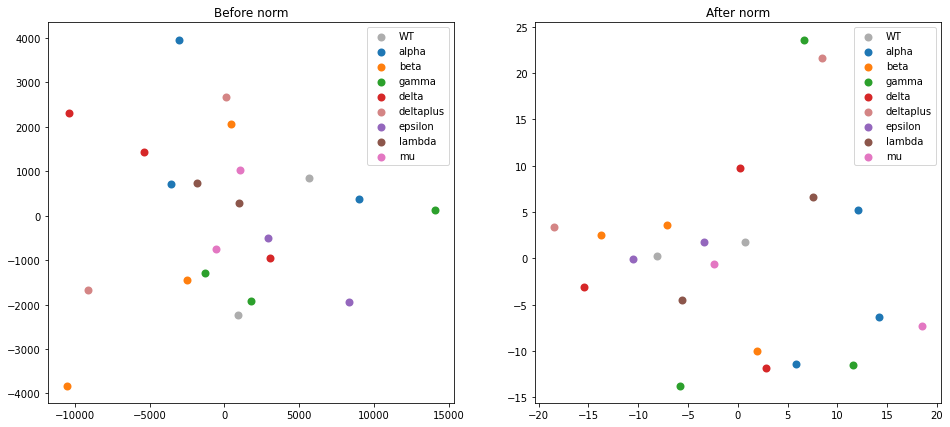

In [28]:
fig, axes = plt.subplots(1,2, figsize = [16, 7])
for data, ax, title in zip([df_clean_old, df_clean], axes, ['Before norm', 'After norm']):
    pca = PCA(n_components=n_components)
    df_pca = pca.fit_transform(data)
    ax = MyPlot(df_pca, colors).return_ax(ax, title)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

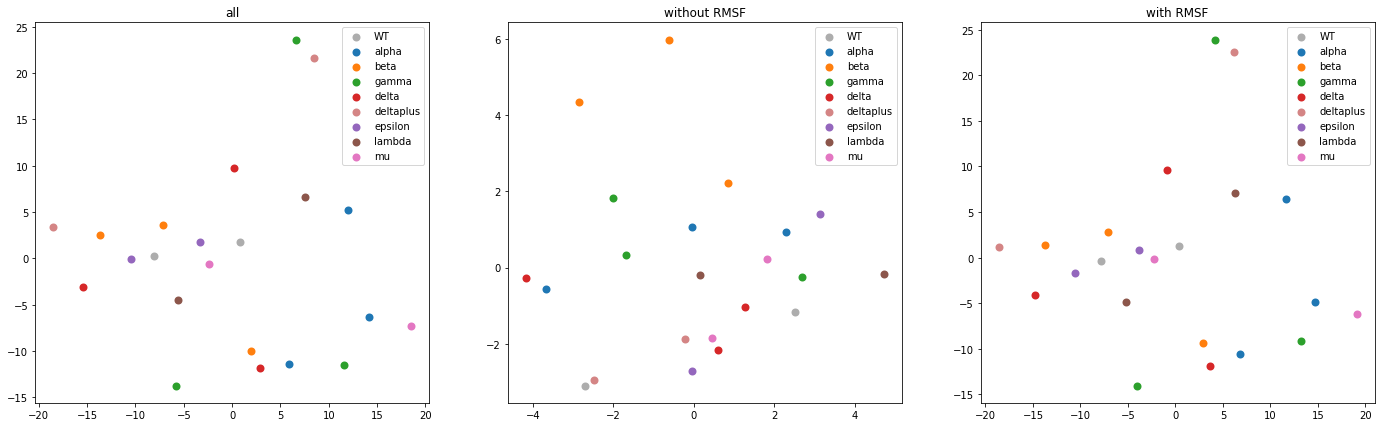

In [29]:
fig, axes = plt.subplots(1,3, figsize = [24, 7])
for data, ax, title in zip([df_clean, df_clean_noRMSF, df_clean_RMSF], axes, ["all", "without RMSF", "with RMSF"]):
    pca = PCA(n_components=n_components)
    df_pca = pca.fit_transform(data)
    ax = MyPlot(df_pca, colors).return_ax(ax, title)
plt.show

## t-SNE

<function matplotlib.pyplot.show(close=None, block=None)>

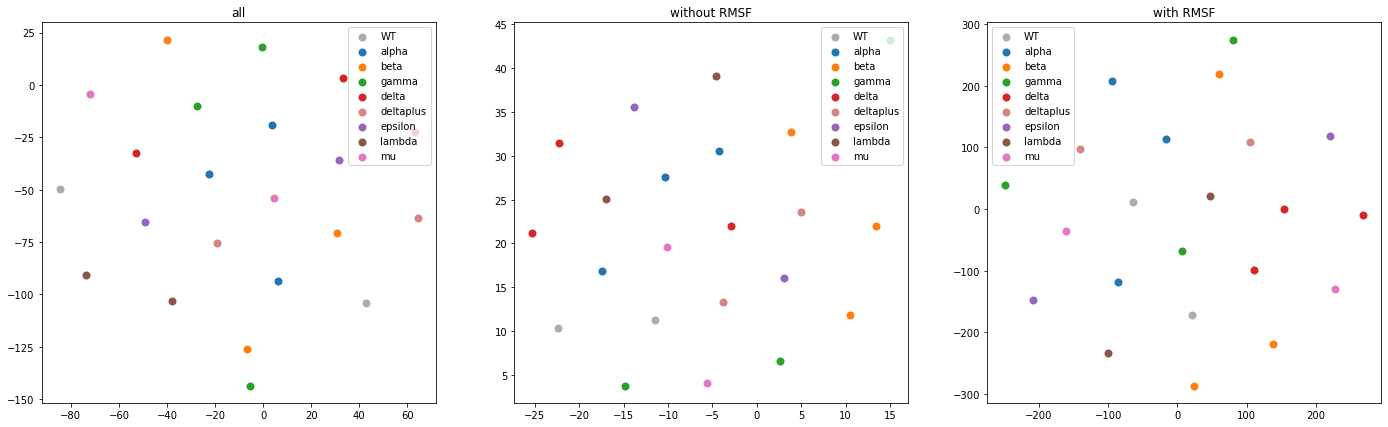

In [20]:
fig, axes = plt.subplots(1,3, figsize = [24, 7])
for data, ax, title in zip([df_clean, df_clean_noRMSF, df_clean_RMSF], axes, ["all", "without RMSF", "with RMSF"]):
    df_tsne = manifold.TSNE(n_components = n_components).fit_transform(df_clean)
    ax = MyPlot(df_tsne, colors).return_ax(ax,title)
plt.show


## PCA Factor Analysis

### CorrPlot class

In [21]:
class CorrPlot():
    def __init__(self, df_clean) -> None:
        self.X = df_clean
    def quick(self, RandPickFeatures = None):
        try:
            features_show = [random.randrange(0,len(self.X.columns),1) for num in range(RandPickFeatures)] #random select 10 features to show
        except:
            features_show = [num for num in range(len(self.X.columns))]
        feature_names = [self.X.columns[i] for i in features_show]
        plt.figure(figsize = [12, 12])
        ax = plt.axes()

        im = ax.imshow(np.corrcoef(self.X.T), cmap="RdBu_r", vmin=-1, vmax=1)

        ax.set_xticks(features_show)
        ax.set_xticklabels(feature_names, rotation=90)
        ax.set_yticks(features_show)
        ax.set_yticklabels(feature_names)

        plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
        ax.set_title("MD features correlation matrix")
        plt.tight_layout()
    
    def return_ax(self, ax , title, RandPickFeatures = None):
        try:
            features_show = [random.randrange(0,len(self.X.columns),1) for num in range(RandPickFeatures)] #random select 10 features to show
        except:
            features_show = [num for num in range(len(self.X.columns))]
        feature_names = [self.X.columns[i] for i in features_show]
        

        im = ax.imshow(np.corrcoef(self.X.T), cmap="RdBu_r", vmin=-1, vmax=1)

        ax.set_xticks(features_show)
        ax.set_xticklabels(feature_names, rotation=90)
        ax.set_yticks(features_show)
        ax.set_yticklabels(feature_names)

        divider = make_axes_locatable(ax)
        cax = divider.append_axes('right', size='3%', pad=0.05)
        fig.colorbar(im, cax=cax, orientation='vertical').ax.set_ylabel("$r$", rotation=0)
        ax.set_title(title)
        fig.tight_layout(pad = 5)
        
        return ax

### Plot

<function matplotlib.pyplot.show(close=None, block=None)>

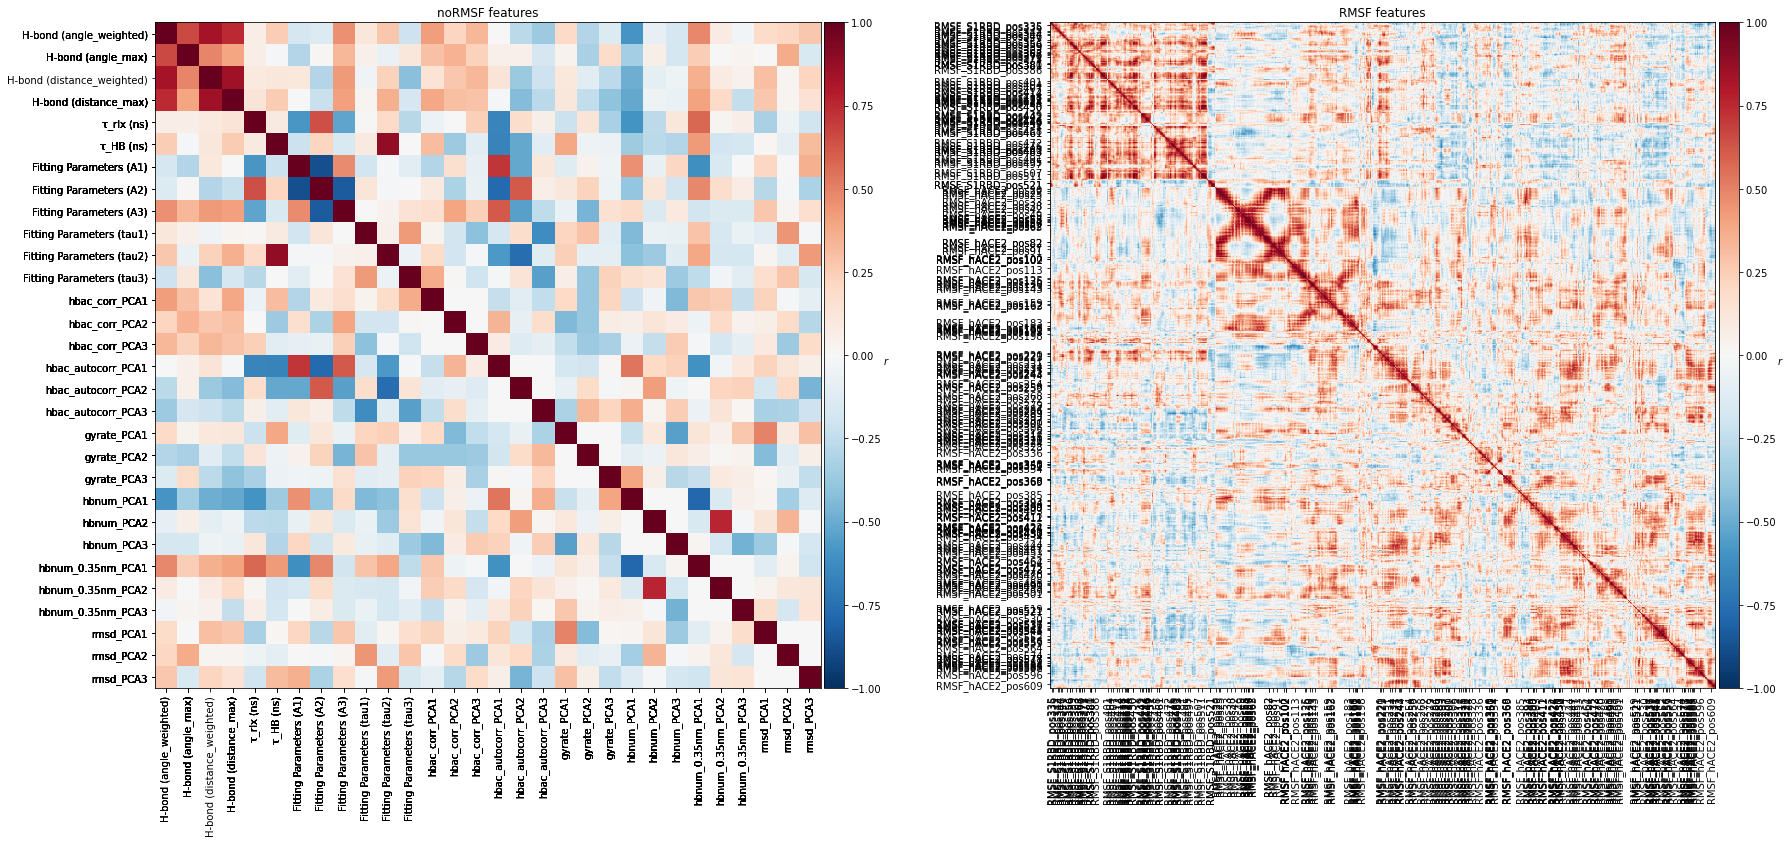

In [22]:
fig, axes = plt.subplots(1,2, figsize = [26, 13])
random.seed(100)
from mpl_toolkits.axes_grid1 import make_axes_locatable

for ax, title, data in zip(axes, ['noRMSF features', 'RMSF features'], [df_clean_noRMSF, df_clean_RMSF]):
    CorrPlot(data).return_ax(ax, title,200)

plt.show

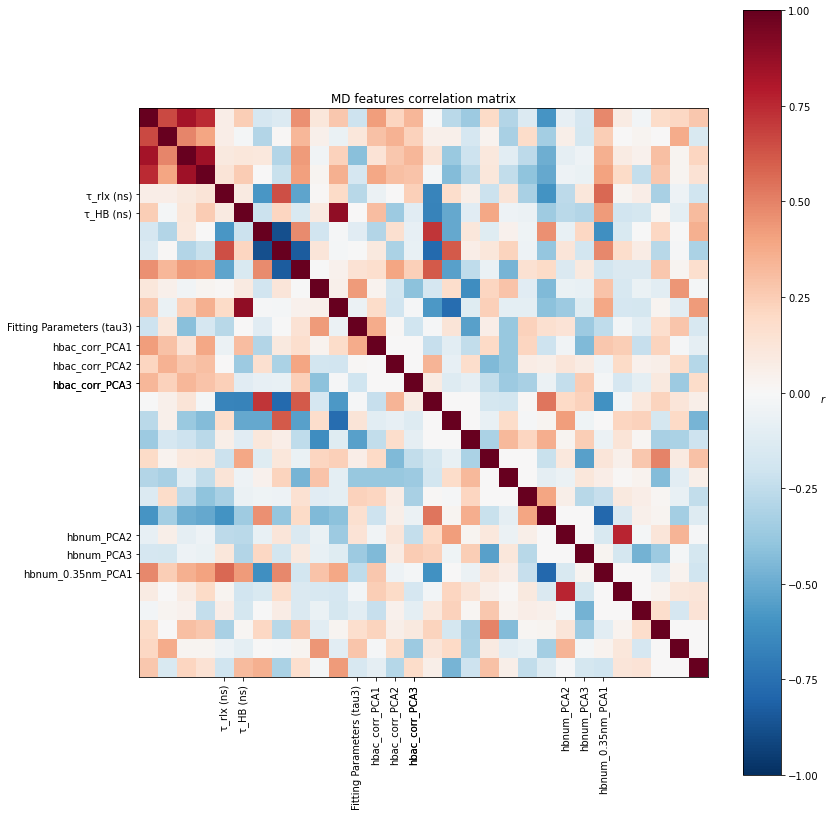

In [23]:
random.seed(100)
data = df_clean_noRMSF.copy()
CorrPlot(data).quick(10)



 PCA :

[[ 0.29085259 -0.24192469  0.07088213]
 [ 0.16217767 -0.1355085   0.22072139]
 [ 0.22392431 -0.27075494 -0.05272095]
 [ 0.2669301  -0.25562674 -0.0180323 ]
 [ 0.22005654  0.22429157 -0.14821242]
 [ 0.27471246  0.01130524 -0.14346977]
 [-0.23497466 -0.26911215 -0.15537371]
 [ 0.17063841  0.38017149  0.07788154]
 [-0.04177434 -0.39417521  0.03789552]
 [ 0.12557245  0.06770091  0.19332761]
 [ 0.26359762 -0.07220948 -0.23386925]
 [-0.033515   -0.00551689  0.35353079]
 [ 0.18707333 -0.07976759  0.21603793]
 [-0.05708187 -0.17027717  0.09639826]
 [ 0.06190989 -0.13471641 -0.17558508]
 [-0.28458463 -0.26847561  0.08320203]
 [-0.09042926  0.28448779  0.27506395]
 [-0.16009048  0.11635906 -0.24430035]
 [ 0.14530832 -0.0206765   0.15921726]
 [-0.04356467  0.21724787 -0.17089673]
 [-0.12090629  0.01839253  0.16066726]
 [-0.36684816 -0.04425135 -0.02411014]
 [-0.08384755  0.04229256  0.29878083]
 [-0.10862381  0.00285812 -0.26225527]
 [ 0.33926291  0.10495126 -0.04374605]
 [ 0.01461152  

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.


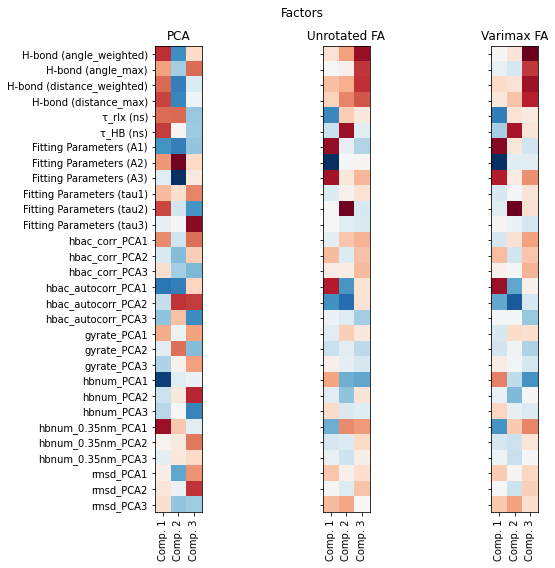

In [36]:
n_comps = 3

methods = [('PCA', PCA()),
           ('Unrotated FA', FactorAnalysis()),
           ('Varimax FA', FactorAnalysis(rotation='varimax'))]
fig, axes = plt.subplots(ncols=len(methods), figsize=(10, 8))

X = df_clean_noRMSF
feature_names = X.columns
for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components=n_comps)
    fa.fit(X)

    components = fa.components_.T
    print("\n\n %s :\n" % method)
    print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
    ax.set_yticks(np.arange(len(feature_names)))
    if ax.is_first_col():
        ax.set_yticklabels(feature_names)
    else:
        ax.set_yticklabels([])
    ax.set_title(str(method))
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(["Comp. 1", "Comp. 2", "Comp. 3"], rotation = 90)
fig.suptitle("Factors")
plt.tight_layout()
plt.show()

## Cluster Map / Heatmap

In [25]:
df_clean.index = df['variants']
df_clean_noRMSF.index = df['variants']
df_clean_RMSF.index = df['variants']

variants_type = variants_target.copy()
variants_type.name = 'variants'
row_colors = variants_type.map(colors)
row_colors.index = df['variants']

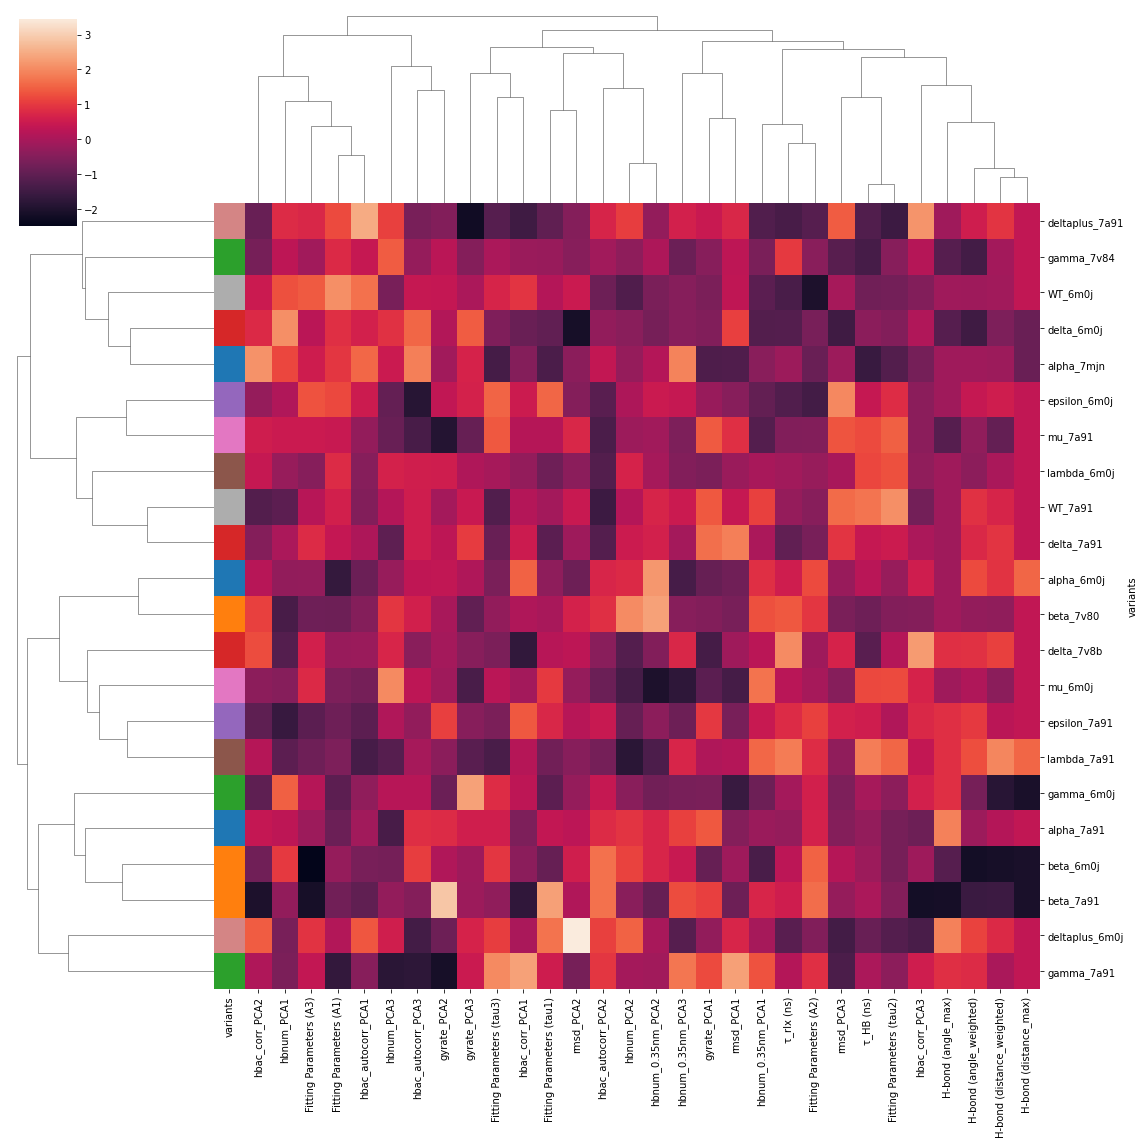

In [35]:
sns.clustermap(df_clean_noRMSF, col_cluster=True, metric="correlation", row_colors = row_colors, figsize=[16, 16])

braycurtis
cityblock
braycurtis
sqeuclidean
minkowski
seuclidean
correlation
euclidean


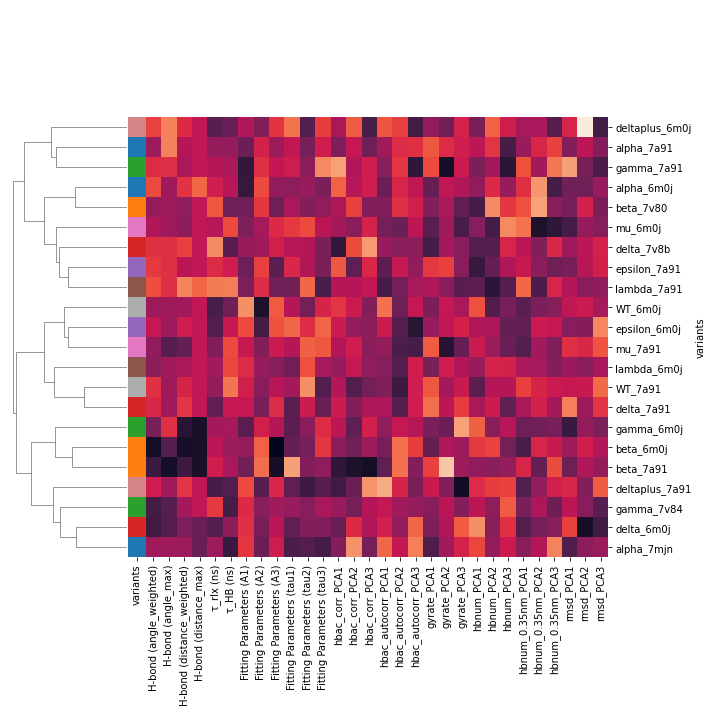

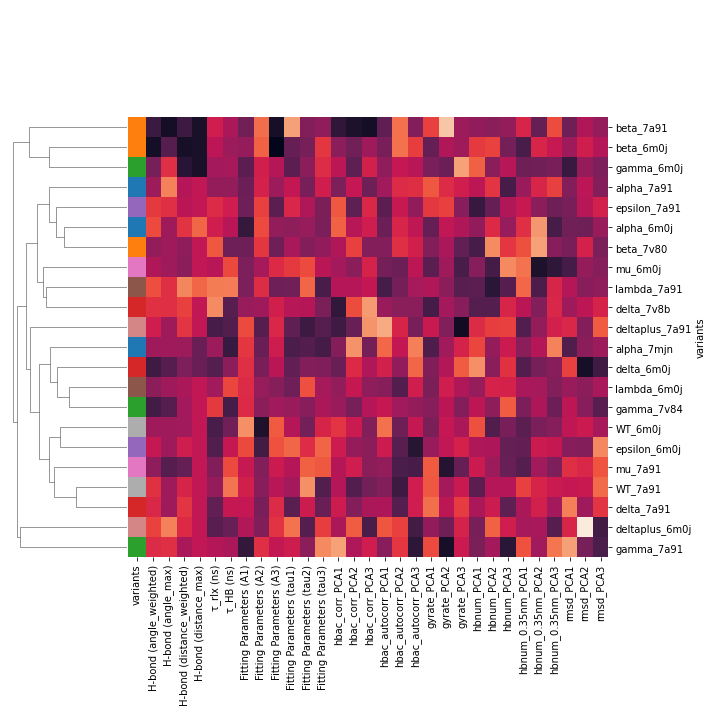

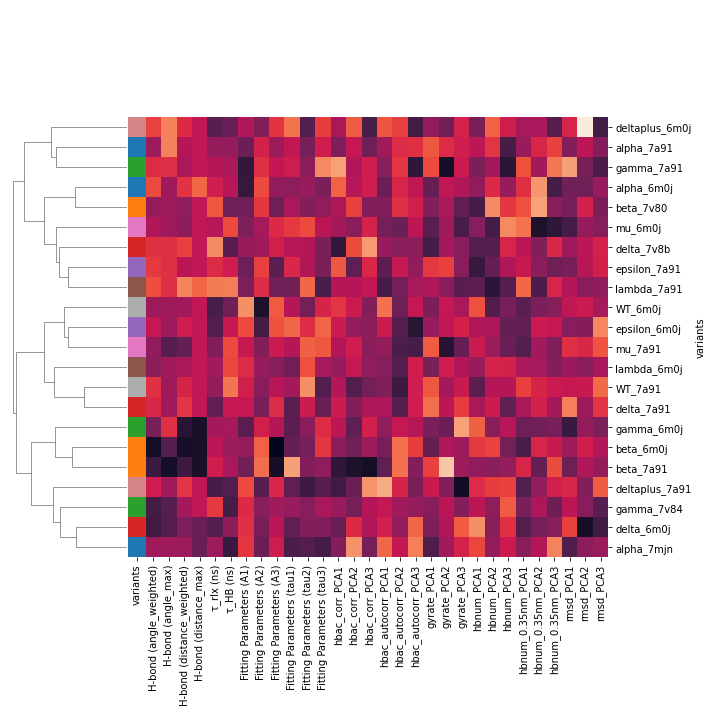

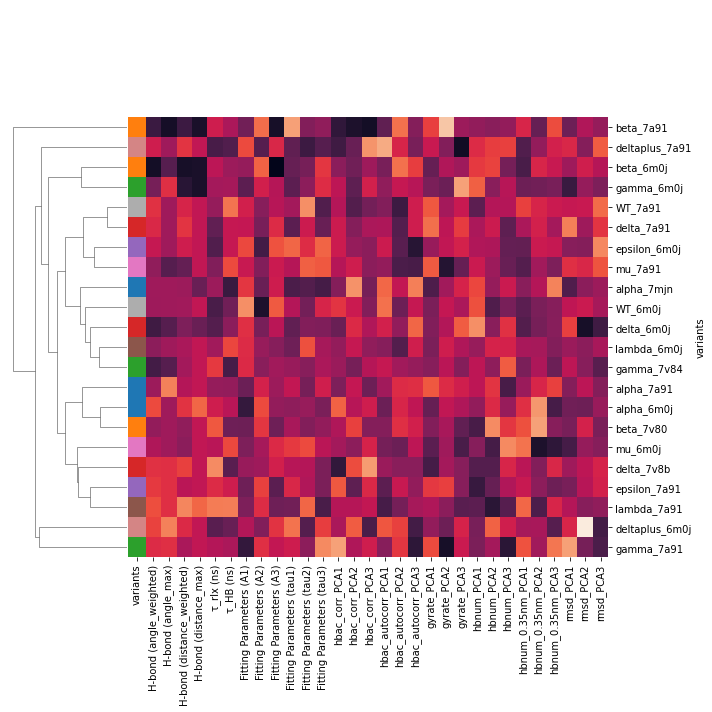

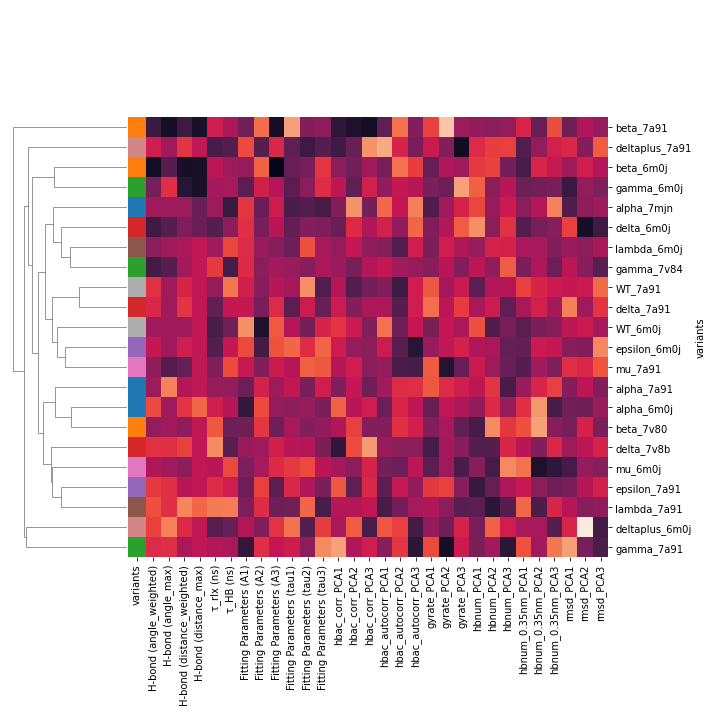

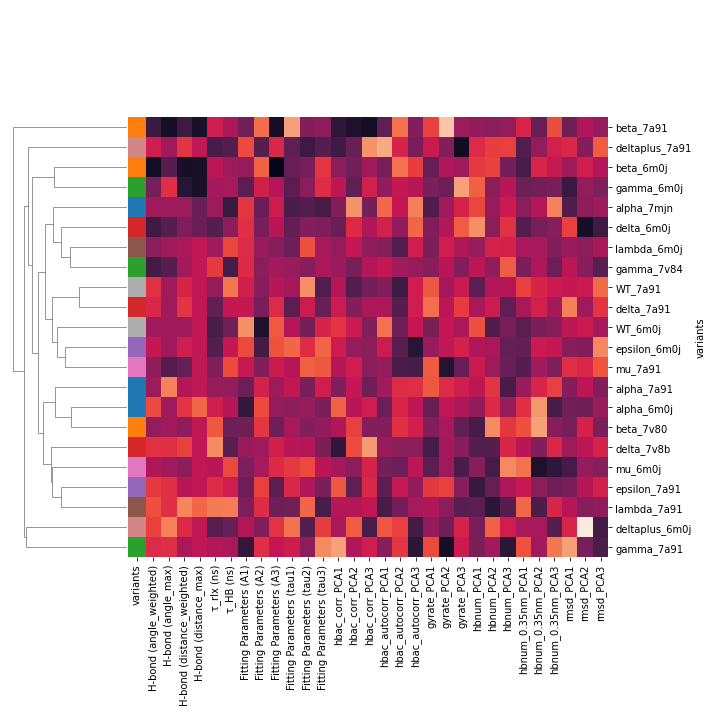

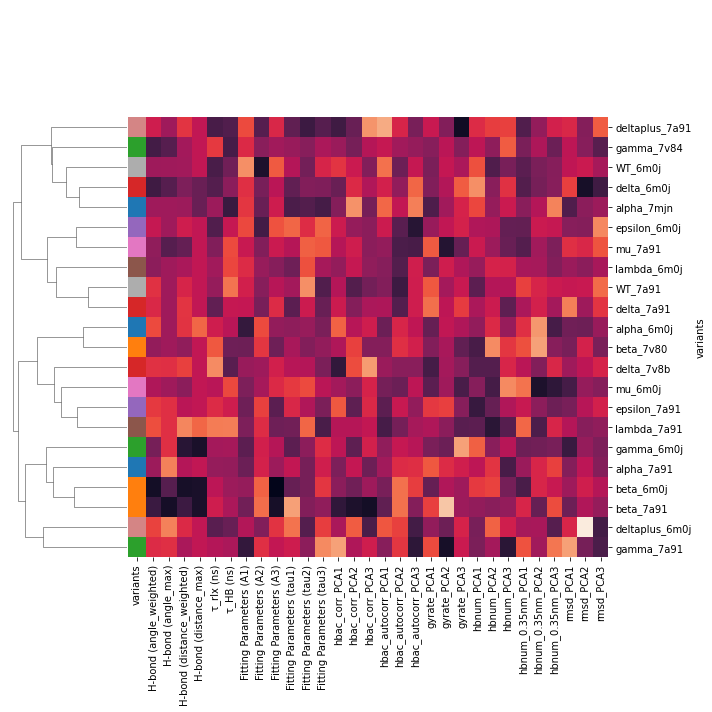

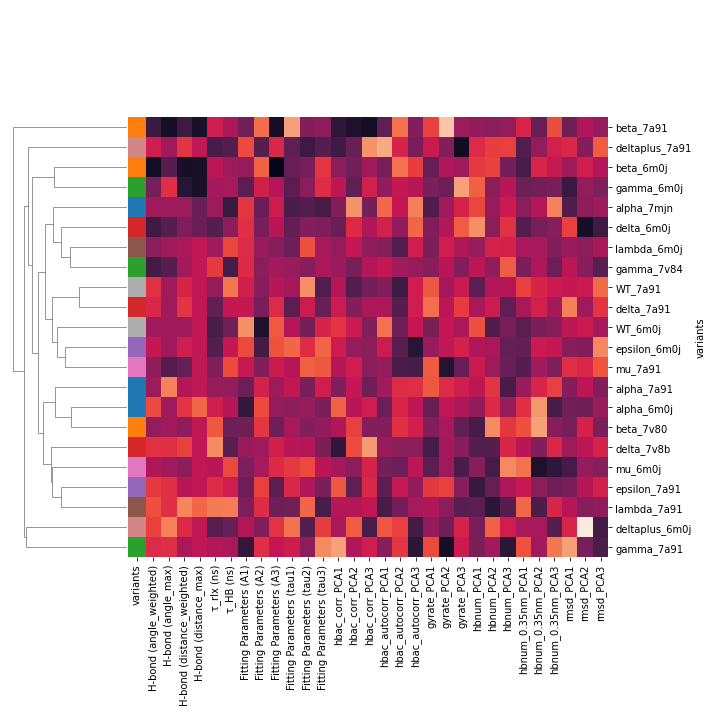

In [37]:
dead_methods = ['mahalanobis','yule', 'jensenshannon','jaccard',]
bad_methods = ['matching', 'russellrao', 'sokalsneath', 'canberra', 'chebyshev', 'rogerstanimoto',
                'hamming', 'kulsinski', 'sokalmichener','dice','cosine']
good_methods = ['braycurtis', 'cityblock','braycurtis', 'sqeuclidean','minkowski', 
                'seuclidean','correlation', 'euclidean' ]
for method in good_methods:
    try:
        sns.clustermap(df_clean_noRMSF, col_cluster=False, metric=method, cbar_pos = None, row_colors = row_colors)
        print(method)
    except:
        pass

In [163]:
df_clean_6m0j = df_clean_noRMSF.iloc[0:8]
df_clean_6m0j.index = df_clean.index[0:8]
df_clean_7a91 = df_clean_noRMSF.iloc[8:16]
df_clean_7a91.index = df_clean.index[8:16]

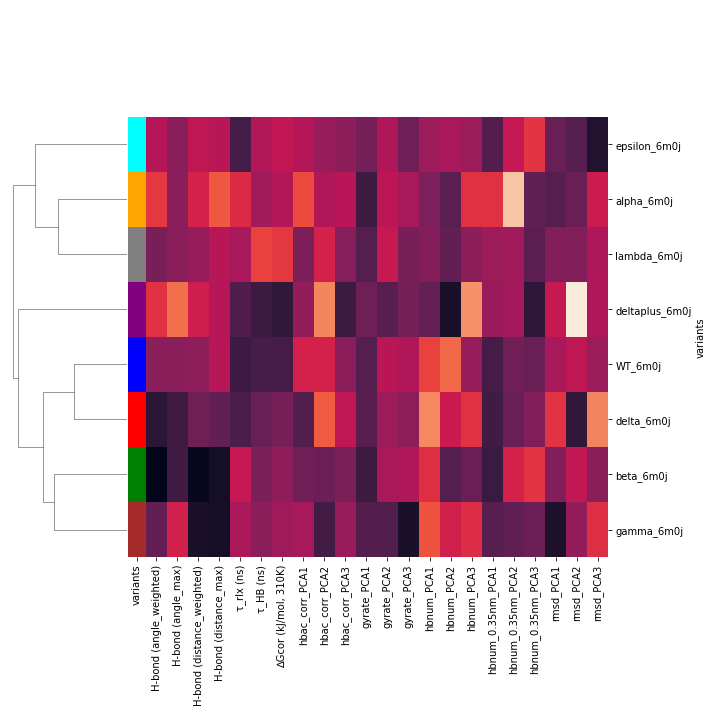

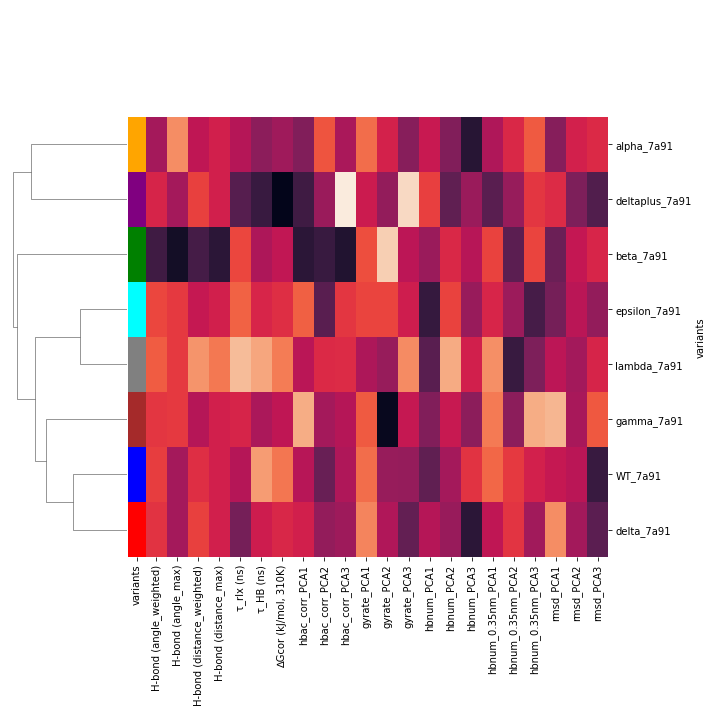

In [164]:
sns.clustermap(df_clean_6m0j, col_cluster=False, metric='correlation', cbar_pos = None, row_colors = row_colors[0:8])
sns.clustermap(df_clean_7a91, col_cluster=False, metric='correlation', cbar_pos = None, row_colors = row_colors[8:16])
